In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df=pd.read_csv(r"C:\Users\HP\.jupyter\homepage_actions.csv")
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


Enrollment Rate: Click through rate for the Enroll button the course overview page.
Average Reading Duration: Average number of seconds spent on the course overview page.
Average Classroom Time: Average number of days spent in the classroom for students enrolled in the course.
Completion Rate: Course completion rate for students enrolled in the course.

### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [3]:
#total number of actions
df.shape

(8188, 4)

In [4]:
#number of unique users
df.id.nunique()

6328

In [5]:
df[df['group']=='experiment']['id'].nunique()

2996

In [6]:
df[df['group']=='control']['id'].nunique()

3332

In [7]:
df.groupby(['group']).nunique()

,timestamp,id,action
group,,,
control,4264,3332,2
experiment,3924,2996,2


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [8]:
df.timestamp.max(),df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [9]:
# action types in this experiment
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [10]:
df.query("action=='click'").id.nunique()/df.query("action=='view'").id.nunique()

0.2939317319848293

In [11]:
#----------------------------------------------------------------------------------------------------------------------

In [12]:
#click-through rate
control_df=df.query('group == "control"')
control_ctr=control_df.query("action=='click'").id.nunique()/control_df.query("action=='view'").id.nunique()
control_ctr

0.2797118847539016

In [13]:
experiment_df=df.query('group == "experiment"')
experiment_ctr=experiment_df.query("action=='click'").id.nunique()/experiment_df.query("action =='view'").id.nunique()
experiment_ctr

0.3097463284379172

In [14]:
obs_diff=experiment_ctr-control_ctr
obs_diff

0.030034443684015644

In [15]:
diffs=[]
for _ in range(10000):
    b_sample=df.sample(df.shape[0],replace=True)
    control_df=b_sample.query('group == "control"')
    experiment_df=b_sample.query('group == "experiment"')
    control_ctr=control_df.query("action=='click'").id.nunique()/control_df.query("action=='view'").id.nunique()
    experiment_ctr=experiment_df.query("action=='click'").id.nunique()/experiment_df.query("action =='view'").id.nunique()
    diffs.append(experiment_ctr-control_ctr)

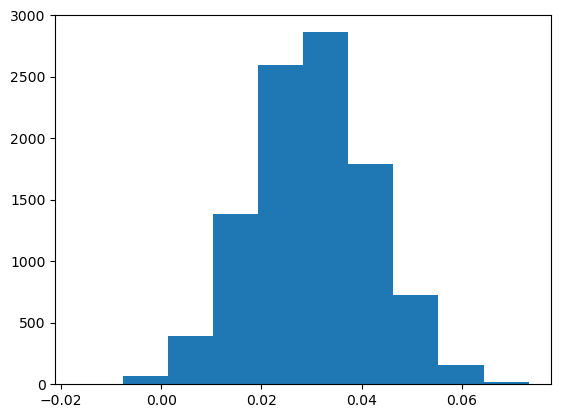

In [16]:
plt.hist(diffs);

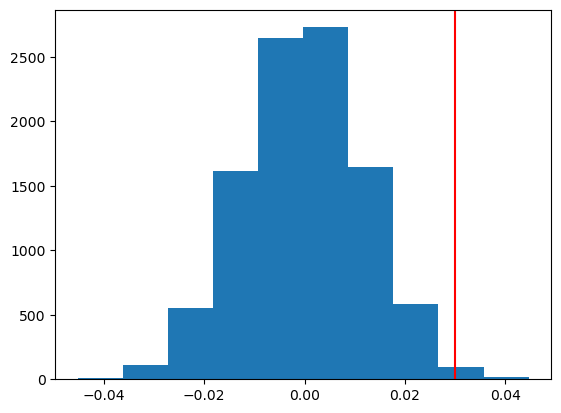

In [17]:
diffs=np.array(diffs)
null_vals=np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_vals)
plt.axvline(obs_diff,color='r');

In [18]:
(null_vals>obs_diff).mean()

0.0055

In [19]:
#------------------------------------------------------------------------------------------------------------

In [20]:
df = pd.read_csv(r"C:\Users\HP\.jupyter\course_page_actions.csv")
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [21]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [22]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [23]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr-control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [24]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

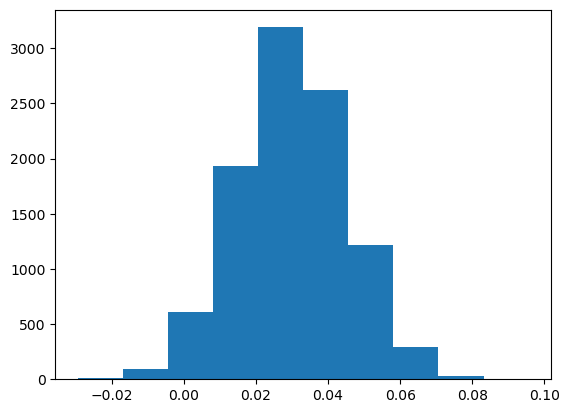

In [25]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

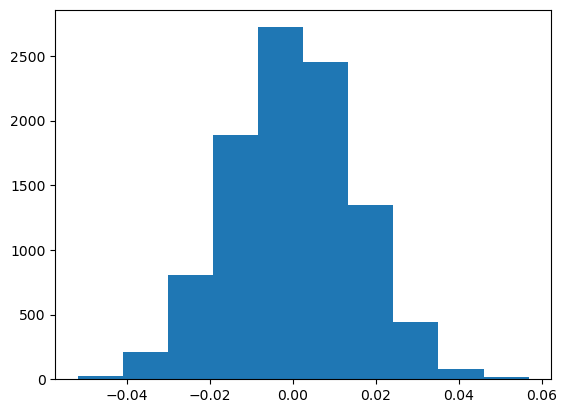

In [26]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

# Plot the null distribution
plt.hist(null_vals);

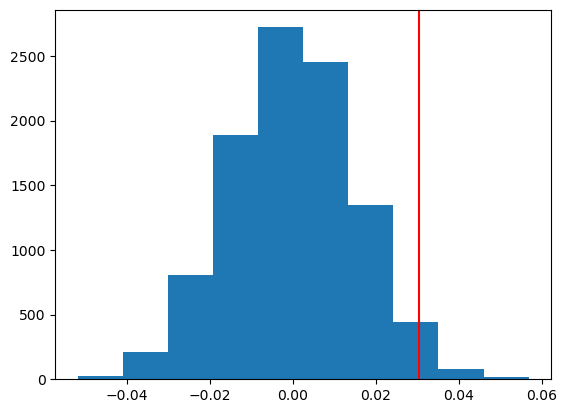

In [27]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)
plt.axvline(obs_diff,color='r');

In [28]:
# Compute p-value
(null_vals>obs_diff).mean()

0.0203

In [29]:
#----------------------------------------------------------

In [30]:
df = pd.read_csv(r"C:\Users\HP\.jupyter\course_page_actions.csv")
df.head(1000)

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
995,2016-10-22 18:17:50.104846,234318,experiment,view,208.717896
996,2016-10-22 18:34:03.610102,288662,control,view,110.391987
997,2016-10-22 19:18:47.400937,698778,experiment,view,65.634427
998,2016-10-22 19:35:55.911907,715064,experiment,enroll,61.496633


In [31]:
#get only the views
views = df.query('action == "view"')

In [32]:
#Group by id and group with the duration mean.
reading_times = views.groupby(['id','group'])['duration'].mean()

In [33]:
#reset index to keep this as a dataframe
reading_times = reading_times.reset_index()

In [34]:
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [35]:
#get means for control/experiment
control_mean = df.query('group == "control"')['duration'].mean()
experiment_mean = df.query('group == "experiment"')['duration'].mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [36]:
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574393

In [37]:
#bootstrap sample
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [38]:
diffs = np.array(diffs)

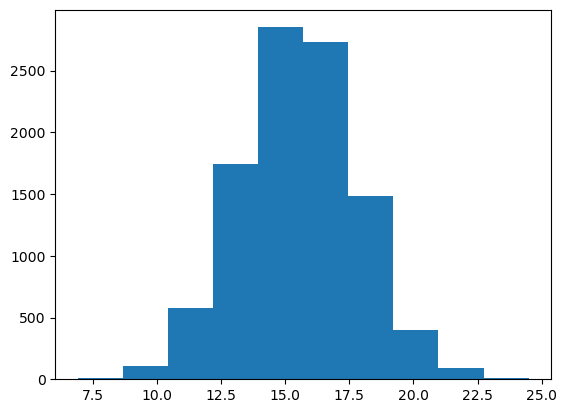

In [39]:
plt.hist(diffs);

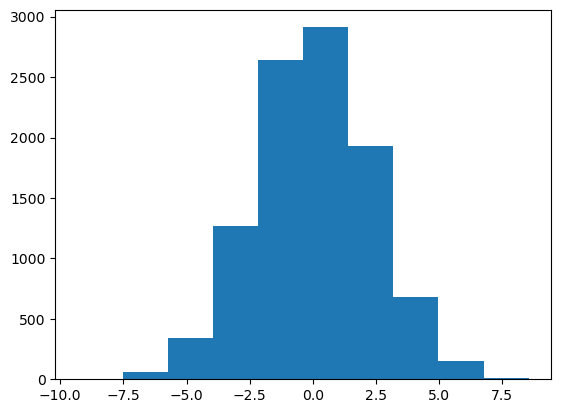

In [40]:
null_vals = np.random.normal(0.,diffs.std(),diffs.size)
plt.hist(null_vals);

In [41]:
#------------------------------------------------------------------------------------------------------------

In [42]:
df = pd.read_csv(r"C:\Users\HP\.jupyter\classroom_actions.csv")
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [43]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [44]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [45]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [46]:
# convert to numpy array
diffs = np.array(diffs)

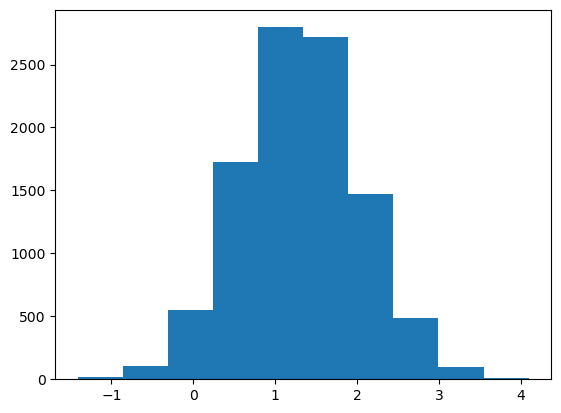

In [47]:
# plot sampling distribution
plt.hist(diffs);

In [48]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

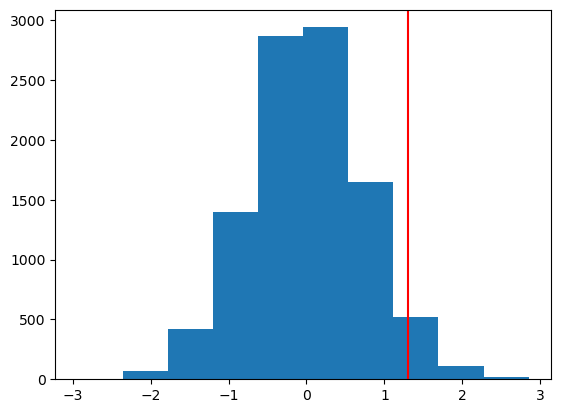

In [49]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [50]:
# compute p value
(null_vals > obs_diff).mean()

0.0393

In [51]:
#-------------------------------------------------------------------------------------------------------------------

In [52]:
df = pd.read_csv(r"C:\Users\HP\.jupyter\classroom_actions.csv")
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [53]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = control_df['completed'].mean()

# Display control complete rate
control_ctr

0.3719951923076923

In [54]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display experiment complete rate
experiment_ctr

0.3935334872979215

In [55]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [56]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df['completed'].mean()
    experiment_ctr = experiment_df['completed'].mean()
    diffs.append(experiment_ctr - control_ctr)

In [57]:
# convert to numpy array
diffs = np.array(diffs)

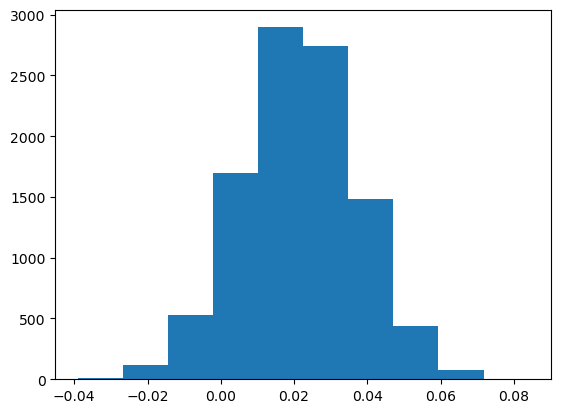

In [58]:
# plot distribution
plt.hist(diffs);

In [59]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

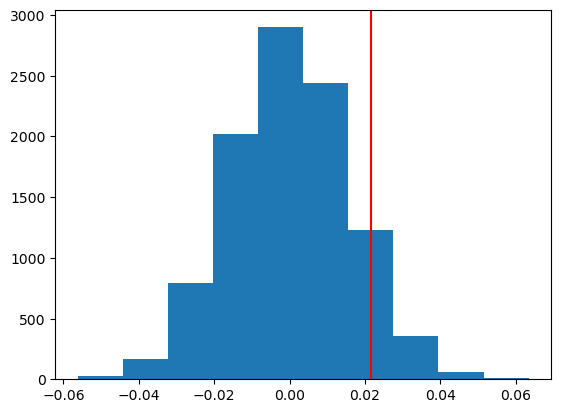

In [60]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [61]:
# compute p value
(null_vals > obs_diff).mean()

0.0893